> 새로운 Competition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.tree
import sklearn.preprocessing
import sklearn.impute
from plotnine import *

In [2]:
df_train = pd.read_csv(".\\data\\train.csv")
df_test = pd.read_csv(".\\data\\test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


> target variable이 Trasproted, 어딘가로 차원이동되었는지 추측하는 것이다. 이는 bool로 이뤄져 있다.

In [5]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
{col : len(set(df_train[col])) for col in df_train.loc[:, df_train.dtypes == object].columns}

{'PassengerId': 8693,
 'HomePlanet': 4,
 'CryoSleep': 3,
 'Cabin': 6561,
 'Destination': 4,
 'VIP': 3,
 'Name': 8474}

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


> 이중 PassengerId, Cabin, Name의 경우 범주형이면서 그 값의 수가 많으므로 고유하다고 판단할 수 있다. Cabin의 경우는 처리가 가능할 수도 있겠으나, 일단 배제한다.

In [8]:
df_train_drop = df_train.drop(['PassengerId', 'Cabin', 'Name'], axis = 1)
df_test_drop = df_test.drop(['PassengerId', 'Cabin', 'Name'], axis = 1)

In [27]:
df_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


> 여기서 결측치를 범주형과 연속형 각각 최빈값과 평균으로 넣어주자.

In [14]:
def df_imputer(df) :
    imputr_obj = sklearn.impute.SimpleImputer(strategy = 'most_frequent')
    imputr_con = sklearn.impute.SimpleImputer(strategy = 'mean')

    df_obj = df.select_dtypes(include = object)
    df_con = df.select_dtypes(exclude = object)

    obj_imputed = pd.DataFrame(imputr_obj.fit_transform(df_obj), columns = df_obj.columns)
    con_imputed = pd.DataFrame(imputr_con.fit_transform(df_con), columns = df_con.columns)

    return pd.concat([obj_imputed, con_imputed], axis = 1)

In [16]:
df_imputer(df_train_drop).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   VIP           8693 non-null   object 
 4   Age           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   float64
dtypes: float64(7), object(4)
memory usage: 747.2+ KB


In [17]:
df_train_imputed = df_imputer(df_train_drop)
df_test_imputed = df_imputer(df_test_drop)

In [22]:
## 1
X = pd.get_dummies(df_train_imputed.drop('Transported', axis = 1), drop_first = True)
y = df_train_imputed.Transported
XX = pd.get_dummies(df_test_imputed, drop_first = True)

## 2
predictr = sklearn.linear_model.LogisticRegression()

## 3
predictr.fit(X, y)

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [23]:
predictr.score(X, y)

0.7869550212814909

> 그렇게 처참하진 않은 점수(그리고 그는 이 점수를 깨기가 얼마나 힘든지 깨닫게 된다.)

In [29]:
sub_df = df_test[['PassengerId']].assign(Transported = predictr.predict(XX))
sub_df.assign(Transported = lambda _df : _df.Transported == 1)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [30]:
sub_df.assign(Transported = lambda _df : _df.Transported == 1).to_csv('submission_SimpleLinearRegression.csv', index = False)

> Lasso를 이용

In [31]:
## 1
X = pd.get_dummies(df_train_imputed.drop('Transported', axis = 1), drop_first = True)
y = df_train_imputed.Transported
XX = pd.get_dummies(df_test_imputed, drop_first = True)

## 2
predictr = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'liblinear')

## 3
predictr.fit(X, y)

LogisticRegressionCV(penalty='l1', solver='liblinear')

In [32]:
predictr.score(X, y)

0.7886805475670079

In [33]:
sub_df = df_test[['PassengerId']].assign(Transported = predictr.predict(XX))
sub_df.assign(Transported = lambda _df : _df.Transported == 1)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [34]:
sub_df.assign(Transported = lambda _df : _df.Transported == 1).to_csv('Submission_Lasso.csv', index = False)

> 그냥 로지스틱으로 한 것보다 더 안좋은 결과...(관련없는 변수는 없었나봄)

In [41]:
pd.get_dummies(df_train_imputed, drop_first = True).corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
Age,1.000000,0.067612,0.127937,0.032655,0.120992,0.099210,-0.074249,0.217444,0.016081,-0.070736,-0.028247,0.003008,0.091574
RoomService,0.067612,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048,-0.067476,0.245451,-0.243986,-0.062828,0.061098,0.056595
FoodCourt,0.127937,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074,0.365500,-0.124781,-0.205682,-0.065542,-0.078216,0.126006
ShoppingMall,0.032655,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019,-0.021019,0.111257,-0.206366,-0.031397,0.031603,0.018483
Spa,0.120992,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791,0.266323,-0.088140,-0.198392,-0.053428,-0.032948,0.060573
VRDeck,0.099210,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825,0.282118,-0.111875,-0.193107,-0.045454,-0.050878,0.123092
Transported,-0.074249,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000,0.176916,0.019544,0.460132,0.000092,-0.096319,-0.037261
HomePlanet_Europa,0.217444,-0.067476,0.365500,-0.021019,0.266323,0.282118,0.176916,1.000000,-0.287022,0.093395,-0.163308,-0.156958,0.147008
HomePlanet_Mars,0.016081,0.245451,-0.124781,0.111257,-0.088140,-0.111875,0.019544,-0.287022,1.000000,0.032715,-0.111260,0.177243,0.043523
CryoSleep_True,-0.070736,-0.243986,-0.205682,-0.206366,-0.198392,-0.193107,0.460132,0.093395,0.032715,1.000000,0.087764,-0.113380,-0.078281


> 고객이 서비스로 소비한 항목들, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck의 경우 합쳐도 될 것 같음.

In [50]:
df_train_Consume = df_train_imputed.assign(Consume = lambda _df : _df.RoomService + _df.FoodCourt + _df.ShoppingMall + _df.Spa + _df.VRDeck)\
.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1)

In [51]:
pd.get_dummies(df_train_Consume).corr()

,Age,Transported,Consume,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
Age,1.000000,-0.074249,0.184509,-0.201109,0.217444,0.016081,0.070736,-0.070736,0.016709,-0.028247,0.003008,-0.091574,0.091574
Transported,-0.074249,1.000000,-0.199445,-0.168845,0.176916,0.019544,-0.460132,0.460132,0.108722,0.000092,-0.096319,0.037261,-0.037261
Consume,0.184509,-0.199445,1.000000,-0.297070,0.408917,-0.070169,0.376500,-0.376500,0.134880,-0.098686,-0.057228,-0.163187,0.163187
HomePlanet_Earth,-0.201109,-0.168845,-0.297070,1.000000,-0.633221,-0.559658,0.107231,-0.107231,-0.156169,0.231177,-0.007418,0.162345,-0.162345
HomePlanet_Europa,0.217444,0.176916,0.408917,-0.633221,1.000000,-0.287022,-0.093395,0.093395,0.293517,-0.163308,-0.156958,-0.147008,0.147008
HomePlanet_Mars,0.016081,0.019544,-0.070169,-0.559658,-0.287022,1.000000,-0.032715,0.032715,-0.120996,-0.111260,0.177243,-0.043523,0.043523
CryoSleep_False,0.070736,-0.460132,0.376500,0.107231,-0.093395,-0.032715,1.000000,-1.000000,-0.065589,-0.087764,0.113380,-0.078281,0.078281
CryoSleep_True,-0.070736,0.460132,-0.376500,-0.107231,0.093395,0.032715,-1.000000,1.000000,0.065589,0.087764,-0.113380,0.078281,-0.078281
Destination_55 Cancri e,0.016709,0.108722,0.134880,-0.156169,0.293517,-0.120996,-0.065589,0.065589,1.000000,-0.162240,-0.783137,-0.045167,0.045167
Destination_PSO J318.5-22,-0.028247,0.000092,-0.098686,0.231177,-0.163308,-0.111260,-0.087764,0.087764,-0.162240,1.000000,-0.486554,0.000592,-0.000592


\- CryoSleep의 경우 Target과의 상관관계가 가장 높음.

In [52]:
df_test_Consume = df_test_imputed.assign(Consume = lambda _df : _df.RoomService + _df.FoodCourt + _df.ShoppingMall + _df.Spa + _df.VRDeck)\
.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1)

In [54]:
## 1
X = pd.get_dummies(df_train_Consume.drop('Transported', axis = 1), drop_first = True)
y = df_train.Transported
XX = pd.get_dummies(df_test_Consume, drop_first = True)

## 2
predictr = sklearn.linear_model.LogisticRegression()

## 3
predictr.fit(X, y)

LogisticRegression()

In [55]:
predictr.score(X, y)

0.7210399171747383

> ...스코어가 더 낮아짐.

In [57]:
df_test[['PassengerId']].assign(Transported = predictr.predict(XX)).to_csv('Drop_and_Summation.csv', index = False)

> 최악의 결과

In [62]:
df_train_imputed[['Transported', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corr()

,Transported,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,1.000000,-0.242048,0.046074,0.010019,-0.218791,-0.204825
RoomService,-0.242048,1.000000,-0.015521,0.052962,0.009925,-0.019207
FoodCourt,0.046074,-0.015521,1.000000,-0.013934,0.220587,0.224275
ShoppingMall,0.010019,0.052962,-0.013934,1.000000,0.013678,-0.007189
Spa,-0.218791,0.009925,0.220587,0.013678,1.000000,0.147957
VRDeck,-0.204825,-0.019207,0.224275,-0.007189,0.147957,1.000000


In [61]:
plot_df = df_train_imputed[['Transported', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

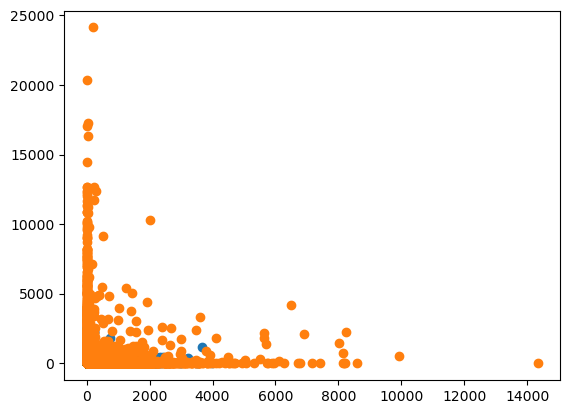

In [67]:
plt.plot(plot_df.loc[plot_df.Transported == True].RoomService, plot_df.loc[plot_df.Transported == True].VRDeck, 'o')
plt.plot(plot_df.loc[plot_df.Transported != True].RoomService, plot_df.loc[plot_df.Transported != True].VRDeck, 'o')

> 데이터가 뭉쳐있어서 파악하기 어려움...

In [77]:
processing = pd.DataFrame(sklearn.preprocessing.PowerTransformer().fit_transform(plot_df.drop('Transported', axis = 1)), columns = plot_df.drop('Transported', axis = 1).columns).assign(Transported = plot_df.Transported)

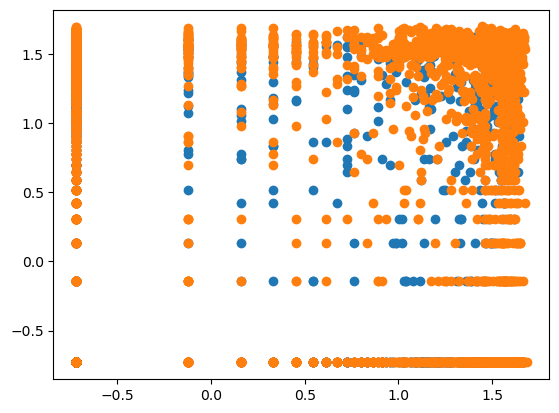

In [78]:
plt.plot(processing.loc[processing.Transported == True].RoomService, processing.loc[processing.Transported == True].VRDeck, 'o')
plt.plot(processing.loc[processing.Transported != True].RoomService, processing.loc[processing.Transported != True].VRDeck, 'o')

> 관련성이... 거의 없어보인다. 잘 모르겠다. 차라리 빼자!

In [79]:
## 1
X = pd.get_dummies(df_train_imputed.drop('Transported', axis = 1), drop_first = True)
y = df_train_imputed.Transported
XX = pd.get_dummies(df_test_imputed, drop_first = True)

## 2
predictr = sklearn.tree.DecisionTreeClassifier()

## 3
predictr.fit(X, y)

DecisionTreeClassifier()

In [80]:
predictr.score(X, y)

0.9346600713217531

In [85]:
df_test[['PassengerId']].assign(Transported = (predictr.predict(XX) == 1)).to_csv('Tree_submission.csv', index = False)

In [100]:
## 1
X = pd.get_dummies(df_train_imputed.drop('Transported', axis = 1), drop_first = True)
y = df_train_imputed.Transported
XX = pd.get_dummies(df_test_imputed, drop_first = True)

## 2
predictr = sklearn.tree.DecisionTreeClassifier(max_depth = 9, min_samples_split = 4)

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

0.8188197400207063

In [101]:
df_test[['PassengerId']].assign(Transported = (predictr.predict(XX) == 1)).to_csv('depth9_split4.csv', index = False)

> 하이퍼 파라미터를 어떻게 잘 조정해도 안된다. 문제에 대한 논의가 필요할듯.

In [104]:
df_train.Cabin

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [ ]:
len(set(df_train.Cabin))

> 사고가 나서 공간이동을 당하게 된 것이라면, 특정 부분에 있는 승객들이 당하는 정도가 크지 않을까?

In [142]:
np.nan

nan

In [157]:
df_train_Cabin = pd.DataFrame(sklearn.impute.SimpleImputer(strategy = 'constant', fill_value = '0/0/0').fit_transform(df_train[['Cabin']]), columns = ['Cabin'])
df_test_Cabin = pd.DataFrame(sklearn.impute.SimpleImputer(strategy = 'constant', fill_value = '0/0/0').fit_transform(df_test[['Cabin']]), columns = ['Cabin'])

In [198]:
train_Cabin = pd.DataFrame(sklearn.impute.SimpleImputer(strategy = 'most_frequent').fit_transform(df_train[['Cabin']].assign(deck = lambda _df : _df.Cabin.apply(lambda x : x.split('/')[0] if type(x) != float else x))\
.assign(num = lambda _df : _df.Cabin.apply(lambda x : x.split('/')[1] if type(x) != float else x))\
.assign(side = lambda _df : _df.Cabin.apply(lambda x : x.split('/')[2] if type(x) != float else x))), columns = ['Cabin', 'deck', 'num', 'side'])\
.drop('Cabin', axis = 1)


test_Cabin = pd.DataFrame(sklearn.impute.SimpleImputer(strategy = 'most_frequent').fit_transform(df_test[['Cabin']].assign(deck = lambda _df : _df.Cabin.apply(lambda x : x.split('/')[0] if type(x) != float else x))\
.assign(num = lambda _df : _df.Cabin.apply(lambda x : x.split('/')[1] if type(x) != float else x))\
.assign(side = lambda _df : _df.Cabin.apply(lambda x : x.split('/')[2] if type(x) != float else x))), columns = ['Cabin', 'deck', 'num', 'side'])\
.drop('Cabin', axis = 1)

In [201]:
df_train_processed = pd.concat([df_train_imputed, train_Cabin], axis = 1).assign(num = lambda _df : _df.num.astype(int))
df_test_processed = pd.concat([df_test_imputed, test_Cabin], axis = 1).assign(num = lambda _df : _df.num.astype(int))

In [205]:
## 1
X = pd.get_dummies(df_train_processed.drop('Transported', axis = 1), drop_first = True)
y = df_train.Transported
XX = pd.get_dummies(df_test_processed, drop_first = True)

## 2
predictr = sklearn.linear_model.LogisticRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7897158633383182

> 좋아진 줄 알았는데... 실제 예측은 그냥 로지스틱 넣은 것보다 떨어져버림... 뭐임...

In [208]:
## 1
X = pd.get_dummies(df_train_processed.drop(['Transported', 'num'], axis = 1), drop_first = True)
y = df_train.Transported
XX = pd.get_dummies(df_test_processed.drop('num', axis = 1), drop_first = True)

## 2
predictr = sklearn.linear_model.LogisticRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7894857931669159

In [209]:
df_test[['PassengerId']].assign(Transported = predictr.predict(XX)).to_csv('Cabin_exclude_num.csv', index = False)

In [210]:
df_train_processed.assign(num = lambda _df : pd.qcut(_df.num, q = 4))

,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,False,39.0,0.0,0.0,0.0,0.0,0.0,0.0,B,"(-0.001, 152.0]",P
1,Earth,False,TRAPPIST-1e,False,24.0,109.0,9.0,25.0,549.0,44.0,1.0,F,"(-0.001, 152.0]",S
2,Europa,False,TRAPPIST-1e,True,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,A,"(-0.001, 152.0]",S
3,Europa,False,TRAPPIST-1e,False,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,A,"(-0.001, 152.0]",S
4,Earth,False,TRAPPIST-1e,False,16.0,303.0,70.0,151.0,565.0,2.0,1.0,F,"(-0.001, 152.0]",S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,41.0,0.0,6819.0,0.0,1643.0,74.0,0.0,A,"(-0.001, 152.0]",P
8689,Earth,True,PSO J318.5-22,False,18.0,0.0,0.0,0.0,0.0,0.0,0.0,G,"(983.0, 1894.0]",S
8690,Earth,False,TRAPPIST-1e,False,26.0,0.0,0.0,1872.0,1.0,0.0,1.0,G,"(983.0, 1894.0]",S
8691,Europa,False,55 Cancri e,False,32.0,0.0,1049.0,0.0,353.0,3235.0,0.0,E,"(407.0, 983.0]",S


In [215]:
set(df_train_processed.assign(num = lambda _df : pd.qcut(_df.num, q = 4)).num)

{Interval(-0.001, 152.0, closed='right'),
 Interval(152.0, 407.0, closed='right'),
 Interval(407.0, 983.0, closed='right'),
 Interval(983.0, 1894.0, closed='right')}

In [218]:
## 1
X = pd.get_dummies(df_train_processed.assign(num = lambda _df : pd.qcut(_df.num, q = 4)).drop('Transported', axis = 1), drop_first = True)
y = df_train.Transported
XX = pd.get_dummies(df_test_processed.assign(num = lambda _df : pd.cut(_df.num, bins = [-0.001, 152, 407, 983, 1894])), drop_first = True)

## 2
predictr = sklearn.linear_model.LogisticRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7907511791096284

In [221]:
df_test[['PassengerId']].assign(Transported = predictr.predict(XX)).to_csv('quantile_cutting.csv', index = False)